In [583]:
import os
import numpy as np
import tensorflow as tf

In [584]:
train_p = 'train'
test_p = 'test'

hd_path = 'train/hot_dog'
nhd_path = 'train/not_hot_dog'


In [585]:
train_data_hd = [os.path.join(hd_path, filename) for filename in os.listdir(hd_path)]
train_data_nhd = [os.path.join(nhd_path, filename) for filename in os.listdir(nhd_path)]

In [586]:
train_data_hd[:5]

['train/hot_dog\\1000288.jpg',
 'train/hot_dog\\1011661.jpg',
 'train/hot_dog\\1013916.jpg',
 'train/hot_dog\\1017226.jpg',
 'train/hot_dog\\1018245.jpg']

In [587]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [588]:
IM_SIZE = 224
number_of_classes = 2

In [589]:
data_gen = ImageDataGenerator()

In [590]:
train_gen = data_gen.flow_from_directory(
    train_p,
    target_size=(IM_SIZE, IM_SIZE),
    batch_size=498,
    class_mode='categorical'
)

Found 895 images belonging to 2 classes.


In [591]:
train_gen

In [592]:
train_gen[0][0].shape  # 1 batch (0th batch)

(498, 224, 224, 3)

In [593]:
train_gen[0][0][0].shape  # 0th image of 0th batch of train_data

(224, 224, 3)

In [594]:
val_gen = data_gen.flow_from_directory(
    test_p,
    target_size=(IM_SIZE, IM_SIZE),
    batch_size=500,
    class_mode='categorical'
)

Found 100 images belonging to 2 classes.


# **IMAGE PREPROCESSING**

In [595]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [596]:
def read_and_preprocess_imgs(im_paths, im_h, im_w):
    imgs = [load_img(img_path, target_size=(im_h, im_w)) for img_path in im_paths]
    img_array = np.array([img_to_array(im) for im in imgs])
    output = preprocess_input(img_array)

    return (output)

In [597]:
train_data_h = read_and_preprocess_imgs(train_data_hd, 224, 224)
train_data_nhs = read_and_preprocess_imgs(train_data_nhd, 224, 224)

In [598]:
train_data_h.shape

(446, 224, 224, 3)

In [599]:
import matplotlib.pyplot as plt

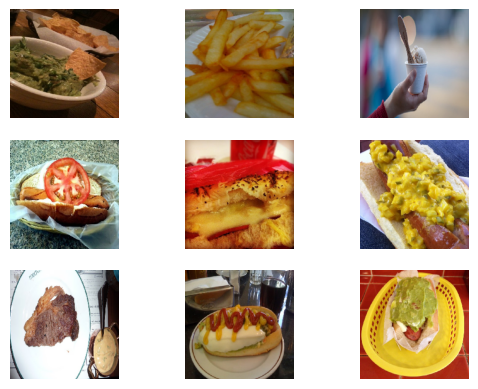

In [600]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(train_gen[0][0][i].astype('uint8'));

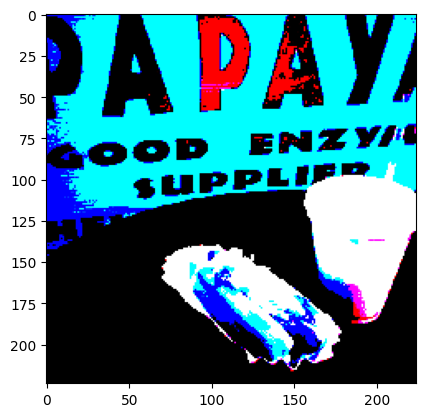

In [601]:
data = train_data_h[0]
plt.imshow(data);

In [602]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy

In [603]:
model = Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Dropout(0.3),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Dropout(0.3),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(number_of_classes, activation='softmax')
])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 dropout_48 (Dropout)        (None, 222, 222, 8)       0         
                                                                 
 conv2d_100 (Conv2D)         (None, 220, 220, 8)       584       
                                                                 
 dropout_49 (Dropout)        (None, 220, 220, 8)       0         
                                                                 
 conv2d_101 (Conv2D)         (None, 218, 218, 8)       584       
                                                                 
 conv2d_102 (Conv2D)         (None, 216, 216, 8)       584       
                                                                 
 conv2d_103 (Conv2D)         (None, 214, 214, 8)     

In [604]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [605]:
train_gen[0][0].shape

(498, 224, 224, 3)

In [606]:
train_gen[0][1].shape

(498, 2)

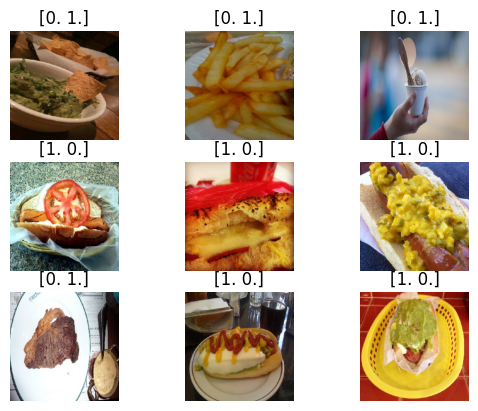

In [607]:
for i, e in enumerate(train_gen[0][0][:9]):
    plt.subplot(3, 3, i + 1)
    plt.title(train_gen[0][1][i])
    plt.imshow(e.astype('uint8'));
    plt.axis('off')

In [608]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [609]:
m_cp = ModelCheckpoint(
    'checkpoint_models/',
    monitor='val_accuracy',
    mode="auto",
    save_freq="epoch",
)

In [610]:
X_train = (train_gen[0][0] / 255)
y_train = (train_gen[0][1])

X_test = (val_gen[0][0] / 255)
y_test = (val_gen[0][1])

In [611]:
hist = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=6,
    verbose=2,
)

Epoch 1/6
16/16 - 16s - loss: 0.7682 - accuracy: 0.5080 - val_loss: 0.6902 - val_accuracy: 0.5100 - 16s/epoch - 993ms/step
Epoch 2/6
16/16 - 14s - loss: 0.6835 - accuracy: 0.5382 - val_loss: 0.7097 - val_accuracy: 0.5000 - 14s/epoch - 886ms/step
Epoch 3/6
16/16 - 14s - loss: 0.6859 - accuracy: 0.5522 - val_loss: 0.6833 - val_accuracy: 0.5300 - 14s/epoch - 869ms/step
Epoch 4/6
16/16 - 14s - loss: 0.6973 - accuracy: 0.5361 - val_loss: 0.6950 - val_accuracy: 0.5000 - 14s/epoch - 867ms/step
Epoch 5/6
16/16 - 14s - loss: 0.6712 - accuracy: 0.5783 - val_loss: 0.6850 - val_accuracy: 0.5600 - 14s/epoch - 874ms/step
Epoch 6/6
16/16 - 14s - loss: 0.6539 - accuracy: 0.6426 - val_loss: 0.6968 - val_accuracy: 0.5100 - 14s/epoch - 874ms/step


In [612]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 89ms/step - loss: 0.6968 - accuracy: 0.5100


[0.6968033313751221, 0.5099999904632568]

In [613]:
y_pred = model.predict(X_test)

4/4 [==============================] - 7s 59ms/step


In [614]:
y_pred[:5]

array([[0.7371273 , 0.26287276],
       [0.7006918 , 0.29930824],
       [0.6798626 , 0.3201374 ],
       [0.7381562 , 0.26184377],
       [0.6766457 , 0.32335436]], dtype=float32)

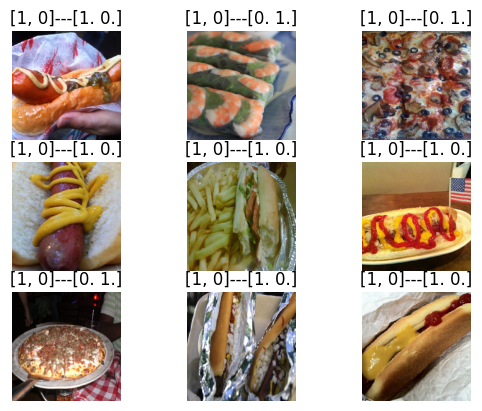

In [615]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(f'{list(map(round, y_pred[i]))}---{y_test[i]}')
    plt.imshow(X_test[i]);

Enough for now